# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html). Inspect the page to identify which elements to scrape. Note that the URL is `https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html`.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html
url='https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
html_soup = soup(html, 'html.parser')

In [5]:
# Extract all rows of data
table = html_soup.find('table', class_='table')
table

<table class="table">
<tbody><tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>
<tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>741.0</td>
</tr>
<tr class="data-row">
<td>35</td>
<td>2012-08-19</td>
<td>13</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>732.0</td>
</tr>
<tr class="data-row">
<td>46</td>
<td>2012-08-20</td>
<td>14</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>57</td>
<td>2012-08-21</td>
<td>15</td>
<td>158</td>
<td>6</td>
<td>-78.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>68</td>
<td>2012-08-22</td>
<td>16</td>
<td>158</td>
<td>6</td>
<

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
#headers list
headers=[]

#get headers
for header in table.find_all('th'):
    title = header.text
    headers.append(title)

In [7]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
# Create a dataframe
mars_df = pd.DataFrame(columns = headers)
mars_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure


In [8]:
# Find the row data 
for row in table.find_all('tr',class_='data-row'):
        data = row.find_all('td')
        row_data=[td.text.strip() for td in data]
        lenghth=len(mars_df)
        mars_df.loc[lenghth]=row_data
        
mars_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [9]:
# Confirm DataFrame was created successfully
# mars_df = mars_df.sort_values(by='id', ascending=True)
mars_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [10]:
# Close the session 
browser.quit()

### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [11]:
# Examine data type of each column
mars_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [12]:
# Change data types for data analysis
mars_df[['id', 'sol', 'ls', 'month']]=mars_df[['id', 'sol', 'ls','month']].apply(pd.to_numeric)
mars_df[['min_temp', 'pressure']]=mars_df[['min_temp', 'pressure']].apply(pd.to_numeric)
mars_df['terrestrial_date'] = pd.to_datetime(mars_df['terrestrial_date'])

In [13]:
# Confirm type changes were successful by examining data types again
print(mars_df.dtypes)

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [14]:
# 1. How many months are there on Mars?
number_months = mars_df.month.nunique()
print(f'There are', number_months ,'months on Mars')

There are 12 months on Mars


In [15]:
# 2. How many Martian days' worth of data are there?
answer_days = mars_df.sol.nunique()
answer_start= mars_df.sol.min()
answer_end = mars_df.sol.max()
print(f'There are', answer_days ,'days of data starting on day', answer_start ,'and ending on day', answer_end,
     '. This means that some days have multiple entries of data.')

There are 1867 days of data starting on day 10 and ending on day 1977 . This means that some days have multiple entries of data.


In [16]:
# 3. What is the average low temperature by month?
low_temps= mars_df.groupby([mars_df["month"]])["min_temp"].mean()
low_temps = pd.DataFrame(low_temps)
low_temps

,min_temp
month,
1,-77.160920
2,-79.932584
3,-83.307292
4,-82.747423
5,-79.308725
6,-75.299320
7,-72.281690
8,-68.382979
9,-69.171642


In [17]:
# Identify the coldest month in Curiosity's location
# must filter down by column
min_avg_temp = low_temps.min()['min_temp']
month=low_temps.loc[low_temps['min_temp']==low_temps['min_temp'].min()].index[0]

print(f'The lowest temperature is', min_avg_temp ,'in month:', month)

The lowest temperature is -83.30729166666667 in month: 3


In [18]:
# Identify the hottes months in Curiosity's location
# must filter down by column
max_avg_temp = low_temps.max()['min_temp']
monthx=low_temps.loc[low_temps['min_temp']==low_temps['min_temp'].max()].index[0]

print(f'The lowest temperature is', max_avg_temp ,'in month:', monthx)

The lowest temperature is -68.38297872340425 in month: 8


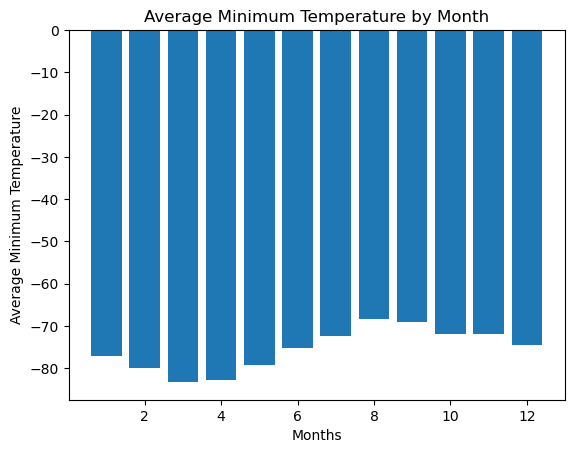

In [19]:
# Plot the average temperature by month
#pandas way
#low_temps.plot(kind='bar')
#plt.show()

#matplotlib way
#plt.bar()
plt.bar(low_temps.index, low_temps['min_temp'])
plt.xlabel("Months")
plt.ylabel("Average Minimum Temperature")
plt.title('Average Minimum Temperature by Month')
plt.show()


In [20]:
# 4. Average pressure by Martian month
avgpressure= mars_df.groupby([mars_df["month"]])["pressure"].mean()
avg_pressure = pd.DataFrame(avgpressure)
avg_pressure

,pressure
month,
1,862.488506
2,889.455056
3,877.322917
4,806.329897
5,748.557047
6,745.054422
7,795.105634
8,873.829787
9,913.305970


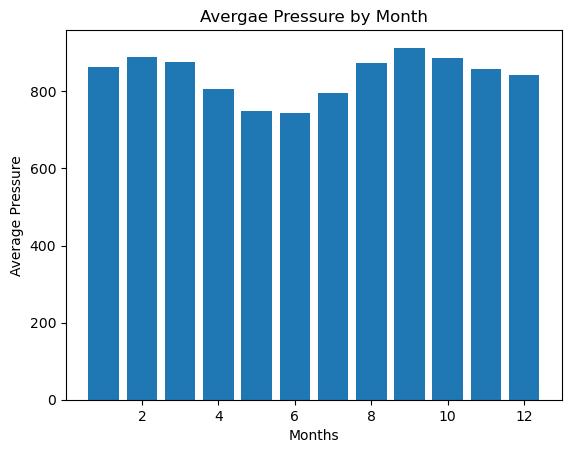

In [21]:
# Plot the average pressure by month
plt.bar(avg_pressure.index, avg_pressure['pressure'])
plt.xlabel("Months")
plt.ylabel("Average Pressure")
plt.title('Avergae Pressure by Month')
plt.show()

In [22]:
# Identify the lowest pressure month in Curiosity's location
# must filter down by column
lowest_pressure = avg_pressure.min()['pressure']
low_month_pressure=avg_pressure.loc[avg_pressure['pressure']==avg_pressure['pressure'].min()].index[0]

print(f'The lowest pressure is', lowest_pressure ,'in month:', low_month_pressure)

The lowest pressure is 745.0544217687075 in month: 6


In [23]:
# Identify the highest pressure month in Curiosity's location
# must filter down by column
highest_pressure = avg_pressure.max()['pressure']
high_month_pressure=avg_pressure.loc[avg_pressure['pressure']==avg_pressure['pressure'].max()].index[0]

print(f'The highest pressure is', highest_pressure ,'in month:', high_month_pressure)

The highest pressure is 913.3059701492538 in month: 9


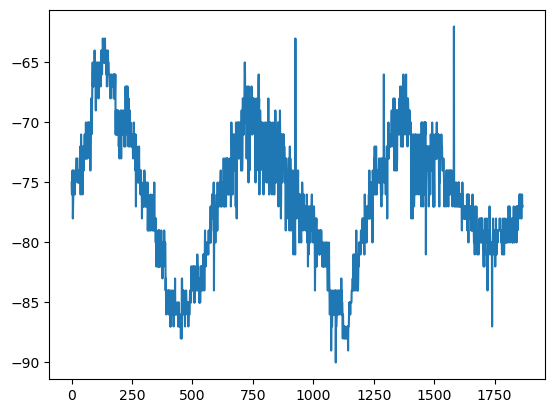

In [24]:
# 5. How many terrestrial (earth) days are there in a Martian year?
mars_df['min_temp'].plot()
plt.show()

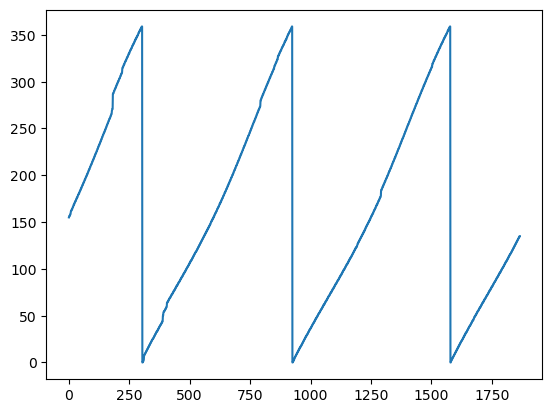

In [25]:
#plot the ls (solar longitude) cycles to see the graph more clearly
#note as 'ls' reaches 360 it then restarts at 0
#AKA how long it takes for it to go around the sun
mars_df['ls'].plot()
plt.show()

In [26]:
#print mars data frame when 'ls' is greater than or equal to 359
#note that the equivalent 'terrestrial_date' jumps about 2 years between cycles
mars_df[mars_df['ls']>= 359]

,id,terrestrial_date,sol,ls,month,min_temp,pressure
302,316,2013-07-30,349,359,12,-75.0,852.0
303,318,2013-07-31,350,359,12,-76.0,853.0
923,955,2015-06-17,1017,359,12,-78.0,850.0
924,956,2015-06-18,1018,359,12,-79.0,850.0
1577,1607,2017-05-04,1686,359,12,-75.0,838.0
1578,1608,2017-05-05,1687,359,12,-75.0,838.0


In [27]:
# import numpy as np dependency
# subract first sol cycle (AKA date 1) from the next sol cycle (AKA date 2)
# Use terrestial date to figure out the Earth days

from datetime import date
date_1=date(2015,6,18)
date_2=date(2013,7,31)
change=date_1-date_2

print(f' There are exactly', change.days, 'Earth days to each Martian year.')

 There are exactly 687 Earth days to each Martian year.


On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [28]:
# Write the data to a CSV
mars_df.to_csv('mars_info.csv',index=False)